# importing the libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load and preprocess the data
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms = sms.rename(columns={"v1": "label", "v2": "text"})

In [3]:
# Print some initial information
print("Number of rows:", len(sms))
print(sms.label.value_counts())
print(sms.describe())

Number of rows: 5572
label
ham     4825
spam     747
Name: count, dtype: int64
       label                    text
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [4]:
# Add a length feature
sms['length'] = sms['text'].apply(len)

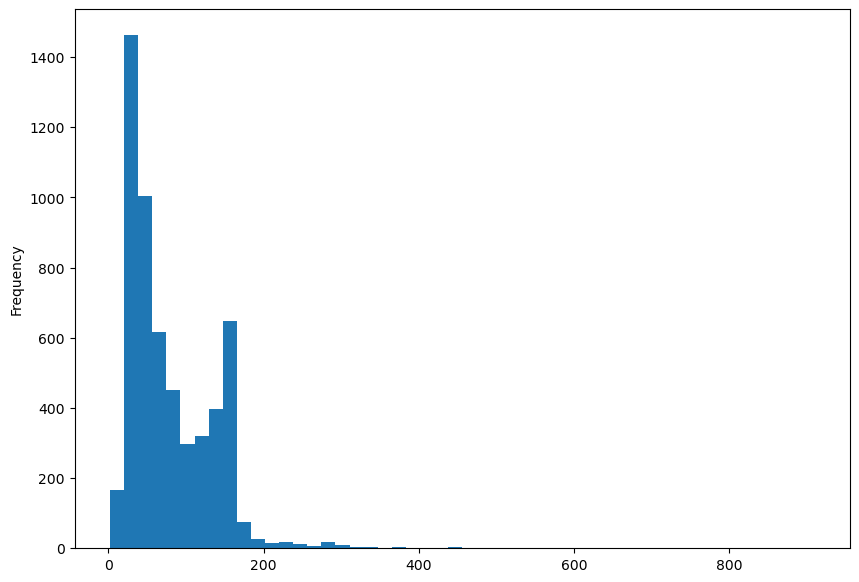

<Figure size 1500x800 with 0 Axes>

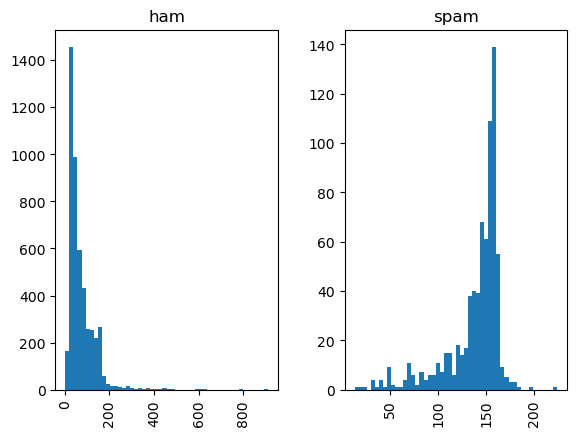

In [5]:
# Visualize the data
plt.figure(figsize=(10, 7))
sms['length'].plot(bins=50, kind='hist')
plt.show()

plt.figure(figsize=(15, 8))
sms.hist(column='length', by='label', bins=50)
plt.show()

In [6]:
# Encode the labels
sms['label'] = sms.label.map({'ham': 0, 'spam': 1})


In [7]:
# Feature extraction
count = CountVectorizer()
text = count.fit_transform(sms['text'])

In [8]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(text, sms['label'], test_size=0.20, random_state=1)


In [9]:
# Initialize and train the model
model = MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [10]:
# Make predictions
prediction = model.predict(x_test)

In [11]:
# Print evaluation metrics
print("MLP Classifier")
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("Precision score: {}".format(precision_score(y_test, prediction)))
print("Recall score: {}".format(recall_score(y_test, prediction)))
print("F1 score: {}".format(f1_score(y_test, prediction)))

MLP Classifier
Accuracy score: 0.9928251121076234
Precision score: 1.0
Recall score: 0.9424460431654677
F1 score: 0.9703703703703703


In [12]:
# Predict on new input
new_input = ["To get 2.50 pounds free call credit and details of great offers pls reply 2 this text"]
new_input_transformed = count.transform(new_input)
new_prediction = model.predict(new_input_transformed)
print("Prediction for new input:", new_prediction)

Prediction for new input: [1]
